This notebook explores a data set about heart disease, found [here](https://www.kaggle.com/ronitf/heart-disease-uci).

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('C:/Users/moria/Documents/Python Projects/heart.csv')

The data set consists of 303 entries across 14 columns -- the <b>target</b> column, which indicates whether the patient did or did not have heart disease, and 13 features: 

1. <b>age</b>: patient's age
2. <b>sex</b>: patient's sex (0 = female, 1 = male)
3. <b>cp</b>: chest pain type (0-3)
4. <b>trestbps</b>: patient's resting blood pressure in mm/Hg
5. <b>chol</b>: patient's cholesterol level in mg/dl
6. <b>fbs</b>: patient's fasting blood sugar level in ml/dl
7. <b>restecg</b>: patient's resting ECG results (0-2)
8. <b>thalach</b>: patient's max heart rate
9. <b>exang</b>: whether patient experienced chest pain with exercise
10. <b>oldpeak</b>: ST depression induced by exercise relative to rest
11. <b>slope</b>: slope of the peak exercise ST segment
12. <b>ca</b>: the number of major vessels colored by fluoroscopy (0,-3)
13. <b>thal</b>: blood flow observed by fluoroscopy (0-3)

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df['target'] = df['target'].replace(to_replace = [0, 1], value = [True, False])



I changed the values in the <b>target</b> column to True/False to make correlations more intuitive. 

In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,0


In [9]:
df.shape

(303, 14)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.455446
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,0.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Looking at the description of the data I noticed that the <b>ca</b> column has a max value of 4, but should only include values 0-3, so I opted to drop the rows where 4 appeared. (Rows 92, 158, 163, 164, 251)

In [12]:
df.loc[df.ca == 4]
df.drop([92, 158, 163, 164, 251], inplace = True)

In [13]:
df.loc[df.chol > 400]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,0
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,0
220,63,0,0,150,407,0,0,154,0,4.0,1,3,3,1
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,1


I also dropped a row (85) where <b>chol</b> was 564, which seemed out of line enough with the rest of the results to possibly be a typo or other mistake.

In [14]:
df.drop(85, inplace = True)

In [15]:
df.target.value_counts()

0    160
1    137
Name: target, dtype: int64

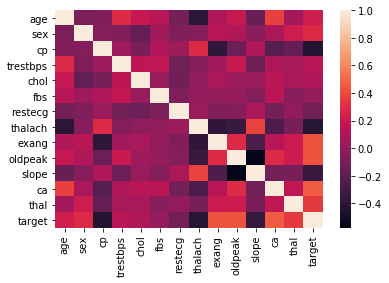

In [16]:
correlations = df.corr()
sns.heatmap(correlations)

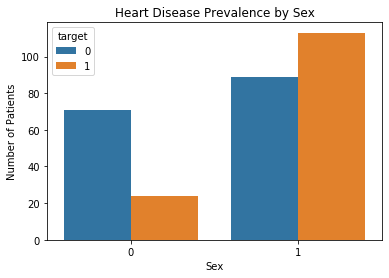

In [17]:
sns.countplot(x='sex', hue='target', data=df)
plt.title('Heart Disease Prevalence by Sex')
plt.xlabel('Sex')
plt.ylabel('Number of Patients')
plt.show()

Men (1) seem more likely to have heart disease than women (0). 

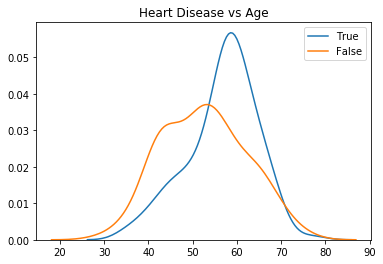

In [20]:
sns.kdeplot(df.loc[df.target == True, "age"])
sns.kdeplot(df.loc[df.target == False, 'age'])
plt.legend(["True" , "False"])
plt.title("Heart Disease vs Age")
plt.show()

Heart disease seems more prevalent among older patients. 

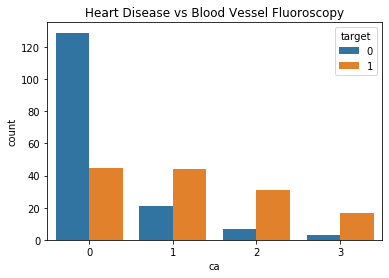

In [21]:
sns.countplot(x='ca', hue='target', data=df)
plt.title('Heart Disease vs Blood Vessel Fluoroscopy')
plt.show()

This value refers to the number of blood vessels in which narrowing is observed, and it seems as though the greater the number, the higher the likelihood of heart disease. 

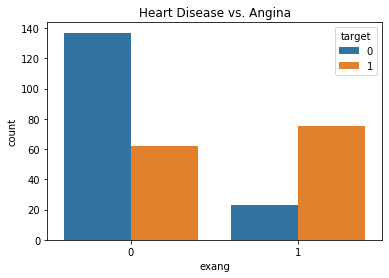

In [22]:
sns.countplot(x='exang', hue='target', data=df)
plt.title("Heart Disease vs. Angina")
plt.show()

It looks like experiencing chest pain during exercise is a good indicator of having heart disease. 

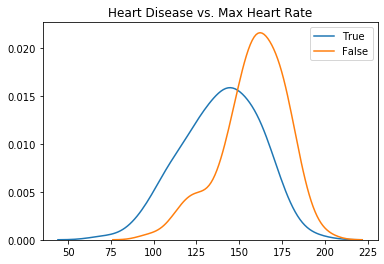

In [24]:
sns.kdeplot(df.loc[df.target == True, 'thalach'])
sns.kdeplot(df.loc[df.target == False, 'thalach'])
plt.legend(['True', 'False'])
plt.title("Heart Disease vs. Max Heart Rate")
plt.show()

It seems like having a lower maximum heart rate during exercise is a moderate indicator of heart disease. 